# Real State Project

<m>

## 1. Exploratory Data Analysis

<m>

### 1.1 Import And Read Data

<m>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df=pd.read_csv("realtor-data.csv")

In [3]:
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,bedroom
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000,2
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000,2
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000,1
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000,2
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000,3
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000,2
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000,2
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600,2
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000,1
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000,3


<m>

### 1.2 Understanding Data

<m>

In [4]:
#report=sv.analyze(df)
#report.show_html('Profilling Report.html')

In [5]:
#report=ydp.ProfileReport(df)
#report.to_file('profiling report.html')

In [6]:
df.shape

(407890, 11)

In [7]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price,bedroom
count,320108.000000,321618.000000,331873.000000,407693.000000,3.243650e+05,4.078900e+05,407890.000000
mean,3.500200,2.566545,17.418487,3299.396838,2.222783e+03,6.758307e+05,1.574937
std,2.320135,2.391618,931.723094,2222.641467,3.333098e+03,1.178266e+06,1.327883
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00,0.000000
25%,2.000000,2.000000,0.200000,1890.000000,1.206000e+03,1.999000e+05,1.000000
50%,3.000000,2.000000,0.560000,2822.000000,1.767000e+03,3.979000e+05,2.000000
75%,4.000000,3.000000,2.200000,4630.000000,2.640000e+03,7.090000e+05,2.000000
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407890 entries, 0 to 407889
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          407890 non-null  object 
 1   bed             320108 non-null  float64
 2   bath            321618 non-null  float64
 3   acre_lot        331873 non-null  float64
 4   city            407838 non-null  object 
 5   state           407890 non-null  object 
 6   zip_code        407693 non-null  float64
 7   house_size      324365 non-null  float64
 8   prev_sold_date  140950 non-null  object 
 9   price           407890 non-null  int64  
 10  bedroom         407890 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 34.2+ MB


In [9]:
df.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price               int64
bedroom             int64
dtype: object

In [10]:
df.isnull().sum()

status                 0
bed                87782
bath               86272
acre_lot           76017
city                  52
state                  0
zip_code             197
house_size         83525
prev_sold_date    266940
price                  0
bedroom                0
dtype: int64

In [11]:
df.duplicated().sum()

371626

<m>

### 1.3 Preparing Data

<m>

In [12]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price', 'bedroom'],
      dtype='object')

In [13]:
df=df[[#'status', 
    'bed', 'bath', 
    #'acre_lot', 
    'city', 'state', 'zip_code',
    'house_size', 'prev_sold_date', 'price','bedroom']].copy()

In [14]:
new_order=['zip_code','bed','bath','bedroom','city','state','house_size','prev_sold_date','price']

In [15]:
df=df[new_order]

In [16]:
df.rename(columns={'prev_sold_date':'Sold_Date','zip_code':'Zip_Code','bed':'No.Beds','bath':'No.Baths','city':'City','state':'State','house_size':'House_Size(s feet)','price':'Price','bedroom':'No.Bedrooms'},inplace=True)

In [17]:
df.head(1)

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,City,State,House_Size(s feet),Sold_Date,Price
0,601.0,3.0,2.0,2,Adjuntas,Puerto Rico,920.0,NaN,105000


<m>

#### 1.3.1 Dealing With Nulls

<m>

In [18]:
df.query('Zip_Code.isnull()')

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,City,State,House_Size(s feet),Sold_Date,Price
679,NaN,3.0,1.0,2,Ponce,Puerto Rico,790.0,NaN,58000
917,NaN,3.0,1.0,2,Ponce,Puerto Rico,790.0,NaN,58000
1022,NaN,3.0,1.0,2,Ponce,Puerto Rico,790.0,NaN,58000
1195,NaN,NaN,NaN,0,Rincon,Puerto Rico,NaN,NaN,650000
1451,NaN,3.0,1.0,2,Ponce,Puerto Rico,790.0,NaN,58000
...,...,...,...,...,...,...,...,...,...
72823,NaN,NaN,NaN,0,Phillipston,Massachusetts,NaN,NaN,27000
76868,NaN,NaN,NaN,0,Phillipston,Massachusetts,NaN,NaN,27000
87708,NaN,NaN,NaN,0,Phillipston,Massachusetts,NaN,NaN,27000
251103,NaN,NaN,NaN,0,Phillipston,Massachusetts,NaN,NaN,27000


In [19]:
df.dropna(subset=['Zip_Code','No.Beds','No.Baths','City','House_Size(s feet)','Sold_Date'],inplace=True)

In [20]:
df.isnull().sum()

Zip_Code              0
No.Beds               0
No.Baths              0
No.Bedrooms           0
City                  0
State                 0
House_Size(s feet)    0
Sold_Date             0
Price                 0
dtype: int64

In [22]:
df.shape

(133333, 9)

<m>

#### 1.3.2 Dealing With Duplicates

<m>

In [22]:
df.loc[df.duplicated()]

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,City,State,House_Size(s feet),Sold_Date,Price
745,729.0,3.0,2.0,2,Canovanas,Puerto Rico,1200.0,2/28/2020,76900
802,729.0,3.0,2.0,2,Canovanas,Puerto Rico,1200.0,2/28/2020,76900
932,729.0,3.0,2.0,2,Canovanas,Puerto Rico,1200.0,2/28/2020,76900
1000,729.0,3.0,2.0,2,Canovanas,Puerto Rico,1200.0,2/28/2020,76900
1031,729.0,3.0,2.0,2,Canovanas,Puerto Rico,1200.0,2/28/2020,76900
...,...,...,...,...,...,...,...,...,...
407885,6226.0,4.0,1.0,2,Windham,Connecticut,1254.0,12/21/2018,197000
407886,6118.0,2.0,1.0,1,East Hartford,Connecticut,624.0,12/13/2017,150000
407887,6109.0,4.0,1.0,2,Wethersfield,Connecticut,1238.0,9/29/2000,199900
407888,6238.0,4.0,3.0,2,Coventry,Connecticut,3320.0,6/1/2021,579900


In [23]:
df.query('Zip_Code==6109.0')

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,City,State,House_Size(s feet),Sold_Date,Price
54128,6109.0,4.0,1.0,2,Wethersfield,Connecticut,1238.0,9/29/2000,199900
54135,6109.0,2.0,2.0,1,Wethersfield,Connecticut,1277.0,4/7/1987,222000
59251,6109.0,4.0,4.0,2,Wethersfield,Connecticut,5117.0,5/26/1978,439000
59541,6109.0,3.0,2.0,2,Wethersfield,Connecticut,1652.0,9/12/1983,179900
59641,6109.0,1.0,1.0,1,Wethersfield,Connecticut,643.0,11/8/2011,95000
...,...,...,...,...,...,...,...,...,...
407789,6109.0,2.0,1.0,1,Wethersfield,Connecticut,792.0,8/30/2019,199000
407799,6109.0,3.0,2.0,2,Wethersfield,Connecticut,1416.0,8/16/2016,250000
407835,6109.0,5.0,5.0,3,Wethersfield,Connecticut,3020.0,8/17/1994,539900
407838,6109.0,5.0,5.0,3,Wethersfield,Connecticut,3952.0,1/17/1996,749000


In [24]:
df=df.loc[~df.duplicated(subset=['Zip_Code','House_Size(s feet)','Sold_Date','Price','No.Beds','No.Baths','City','State'])]

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(11676, 9)

<g>

#### 1.3.3 Dealing With Outliears

Z-Score

<f>

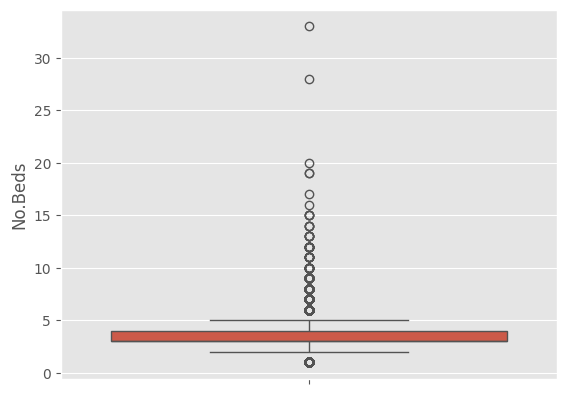

In [28]:
sns.boxplot(df["No.Beds"])
plt.show()

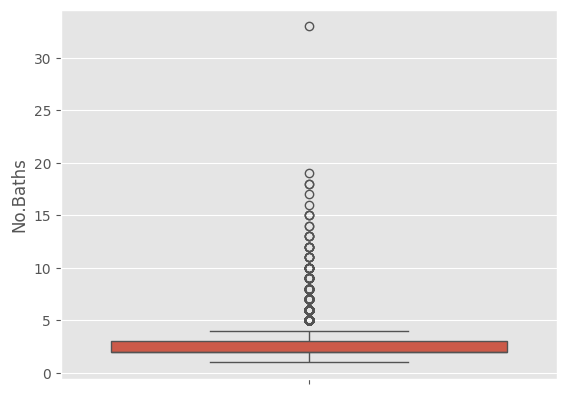

In [29]:
sns.boxplot(df["No.Baths"])
plt.show()

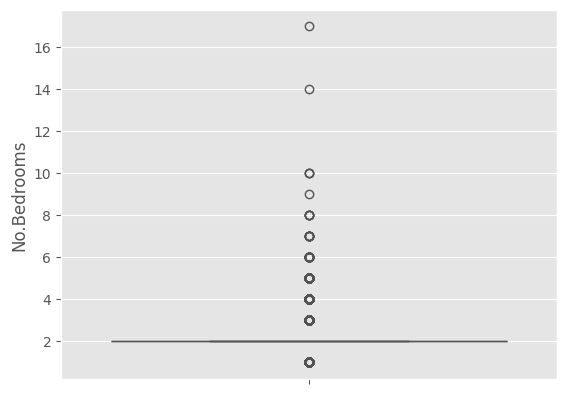

In [30]:
sns.boxplot(df["No.Bedrooms"])
plt.show()

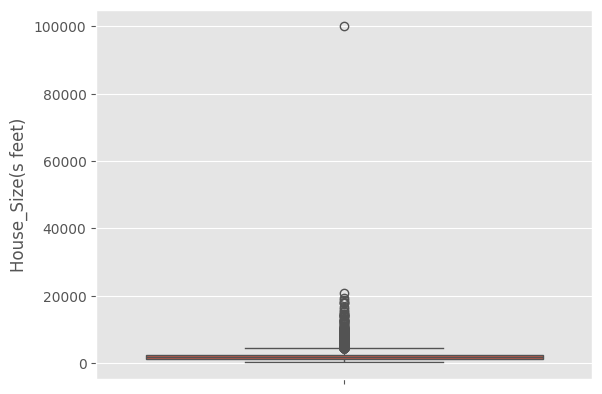

In [31]:
sns.boxplot(df["House_Size(s feet)"])
plt.show()

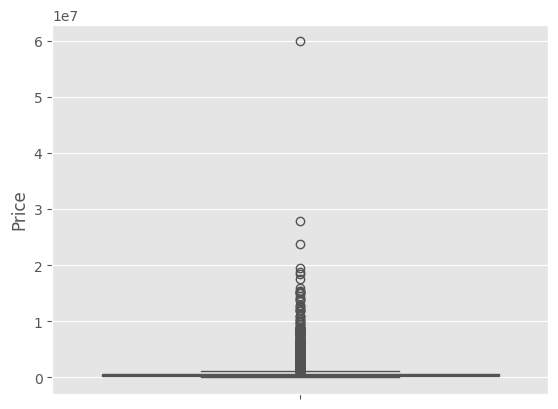

In [32]:
sns.boxplot(df["Price"])
plt.show()

In [33]:
def calculate_upper_limit(column):
    upper_limit = column.mean() + 3 * column.std()
    return upper_limit    

In [34]:
def calculate_lower_limit(column):
    lower_limit = column.mean() - 3 * column.std()
    return lower_limit

In [35]:
upper_limit = calculate_upper_limit(df['House_Size(s feet)'])
lower_limit = calculate_lower_limit(df['House_Size(s feet)'])
print(f'Upper Limit: {upper_limit}\n Lower Limit: {lower_limit}')

Upper Limit: 7117.794714075286
 Lower Limit: -2969.5903632702157


In [36]:
df=df.loc[(df['No.Beds']<=20)] 

In [37]:
df=df.loc[(df['No.Bedrooms']<=10)]

In [38]:
df=df.loc[(df['House_Size(s feet)']<=10000)]

In [39]:
df=df.loc[(df['Price']<=20000000)]

In [40]:
df.shape

(11628, 9)

In [40]:
df.describe()

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,House_Size(s feet),Price
count,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,1.162800e+04
mean,4406.111971,3.370915,2.410647,1.947626,2021.469470,6.127197e+05
std,2600.016401,1.454545,1.228239,0.753028,1221.425447,9.311628e+05
min,725.000000,1.000000,1.000000,1.000000,170.000000,1.000000e+04
25%,2446.000000,3.000000,2.000000,2.000000,1210.000000,2.599000e+05
50%,3301.000000,3.000000,2.000000,2.000000,1664.000000,3.799000e+05
75%,6117.000000,4.000000,3.000000,2.000000,2461.000000,6.200000e+05
max,30228.000000,17.000000,18.000000,9.000000,10000.000000,1.750000e+07


In [42]:
df['Price'].sum()

7124704795

<b>

#### 1.3.4 Formating And Adding Columns

<m>

In [41]:
df['No.Beds']=df['No.Beds'].astype('int')

In [42]:
df['No.Baths']=df['No.Baths'].astype('int')

<m>

Date Formate

<m>

In [43]:
df["Sold_Date"] = pd.to_datetime(df['Sold_Date'], infer_datetime_format=True)

In [44]:
try:
    pd.to_datetime(df['Sold_Date'], infer_datetime_format=True)
    print('Valid datetime formate')
except ValueError:
    print('Invalid datetime formate')

Valid datetime formate


In [45]:
df.dtypes

Zip_Code                     float64
No.Beds                        int32
No.Baths                       int32
No.Bedrooms                    int64
City                          object
State                         object
House_Size(s feet)           float64
Sold_Date             datetime64[ns]
Price                          int64
dtype: object

<m>

Year

<m>

In [126]:
df['Year']=df['Sold_Date'].dt.year

<b>

Size Status

<g>

In [46]:
df['Size_Status']='undifiend'

In [47]:
for index, row in df.iterrows():
    if row['House_Size(s feet)'] <= 2000:
        df.loc[index, 'Size_Status'] = 'Small House'
    elif 2000 < row['House_Size(s feet)'] < 7000:
        df.loc[index, 'Size_Status'] = 'Medium House'
    elif row['House_Size(s feet)'] >= 7000:
        df.loc[index, 'Size_Status'] = 'Large House'

In [48]:
df.head(10)

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,City,State,House_Size(s feet),Sold_Date,Price,Size_Status
684,729.0,3,2,2,Canovanas,Puerto Rico,1200.0,2020-02-28,76900,Small House
829,949.0,7,3,4,Dorado,Puerto Rico,1192.0,2019-06-28,110000,Small House
4608,725.0,3,2,2,Caguas,Puerto Rico,1625.0,2021-09-15,159000,Small House
10344,802.0,5,4,3,Saint Thomas,Virgin Islands,5000.0,2013-10-11,950000,Medium House
10351,802.0,4,6,2,Saint Thomas,Virgin Islands,4600.0,2018-04-05,6899000,Medium House
18171,926.0,6,5,3,San Juan,Puerto Rico,4210.0,2022-03-18,1225000,Medium House
18305,949.0,3,1,2,Toa Baja,Puerto Rico,950.0,2022-02-28,73400,Small House
18810,926.0,4,4,2,San Juan,Puerto Rico,3700.0,2022-03-23,975000,Medium House
24233,1001.0,2,2,1,Agawam,Massachusetts,892.0,2019-04-30,169900,Small House
24237,1001.0,3,3,2,Agawam,Massachusetts,2314.0,2014-06-25,525000,Medium House


<f>

### 1.4 Understanding Features

<m>

### (Univariant Analysis)

<m>

Distribution Of Features

<m>

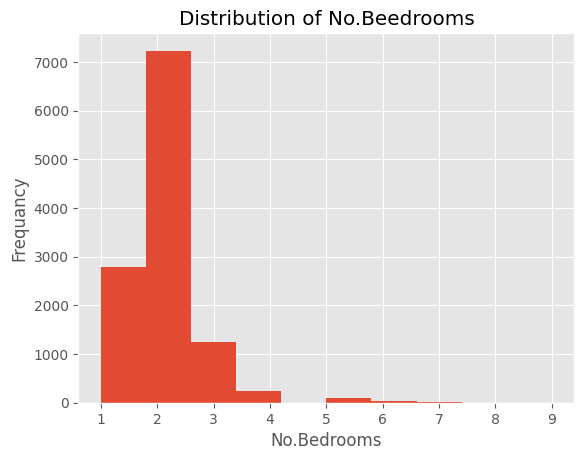

In [49]:
ax=df['No.Bedrooms'].plot(kind='hist',title='Distribution of No.Beedrooms')
ax.set_xlabel('No.Bedrooms')
ax.set_ylabel('Frequancy')
plt.show()

In [50]:
df['No.Bedrooms'].unique()

array([2, 4, 3, 1, 5, 6, 7, 9, 8], dtype=int64)

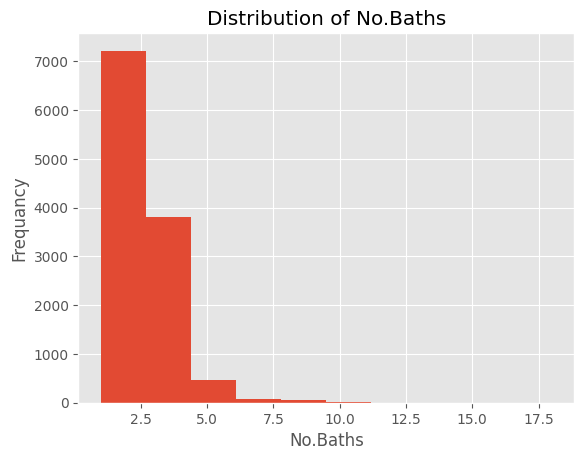

In [51]:
ax=df['No.Baths'].plot(kind='hist',title='Distribution of No.Baths')
ax.set_xlabel('No.Baths')
ax.set_ylabel('Frequancy')
plt.show()

In [52]:
df['No.Baths'].unique()

array([ 2,  3,  4,  6,  5,  1, 10,  7,  9,  8, 12, 18, 11, 14, 13])

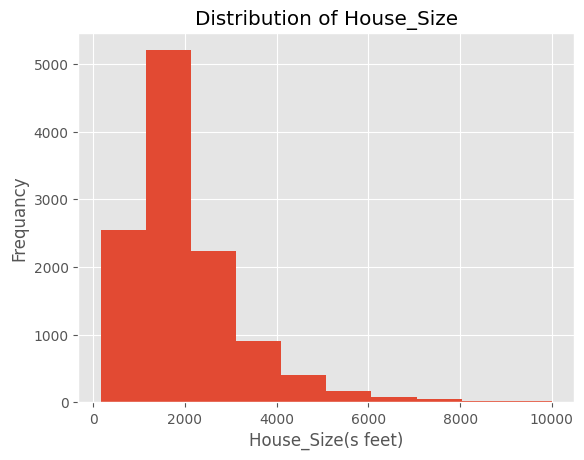

In [53]:
ax=df['House_Size(s feet)'].plot(kind='hist',title='Distribution of House_Size')
ax.set_xlabel('House_Size(s feet)')
ax.set_ylabel('Frequancy')
plt.show()

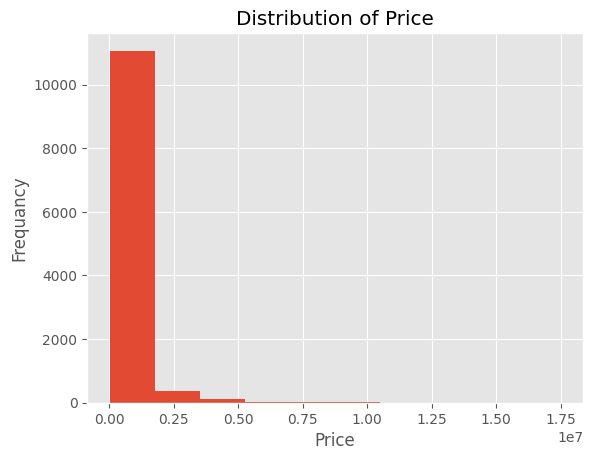

In [54]:
ax=df['Price'].plot(kind='hist',title='Distribution of Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequancy')
plt.show()

<m>

## 2. Analyzing Data

<g>

### 2.1 Heatmap

<b>

In [55]:
numeric_columns=df.select_dtypes(include=['number'])

In [56]:
cor1=numeric_columns.corr()
cor1

,Zip_Code,No.Beds,No.Baths,No.Bedrooms,House_Size(s feet),Price
Zip_Code,1.000000,0.042997,-0.002390,0.051815,-0.029076,-0.149479
No.Beds,0.042997,1.000000,0.559980,0.943675,0.650671,0.224180
No.Baths,-0.002390,0.559980,1.000000,0.523358,0.788573,0.538366
No.Bedrooms,0.051815,0.943675,0.523358,1.000000,0.604131,0.202882
House_Size(s feet),-0.029076,0.650671,0.788573,0.604131,1.000000,0.531730
Price,-0.149479,0.224180,0.538366,0.202882,0.531730,1.000000


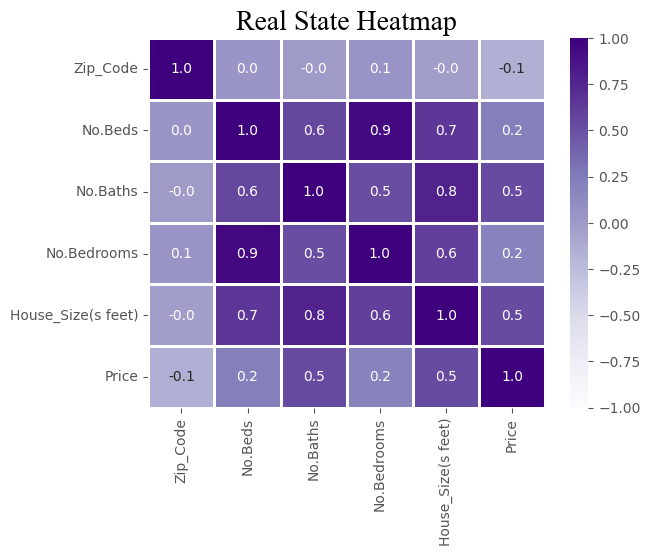

In [57]:
sns.heatmap(cor1,annot=True,fmt='.1f',vmax=1,vmin=-1,center=0,edgecolor='k',cmap='Purples',linewidth=1)
plt.title('Real State Heatmap',fontfamily='times new roman',size=20)
plt.show()

<n>

### 2.2 City With The Most Houses

<m>

In [58]:
c_mh=df.groupby('City').size().sort_values(ascending=False).head(10)
c_mh

City
Boston           466
Providence       256
Waterbury        229
Bristol          185
Manchester       176
Hartford         165
West Hartford    131
Meriden          127
Cranston         125
Hamden           125
dtype: int64

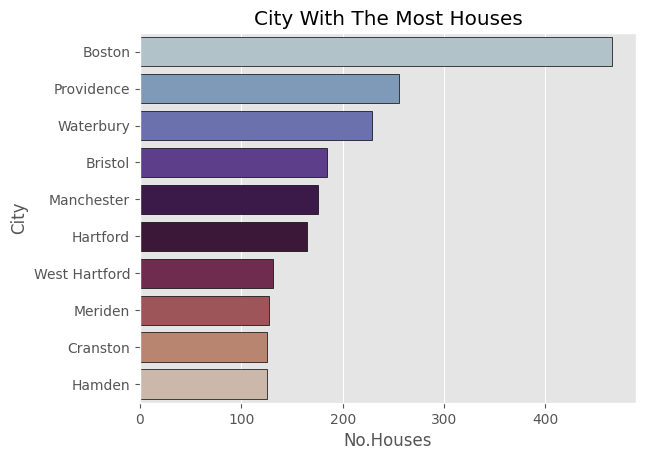

In [59]:
sns.barplot(x=c_mh.values,y=c_mh.index,edgecolor='k',palette='twilight')
plt.title('City With The Most Houses')
plt.xlabel('No.Houses')
plt.ylabel('City')
plt.show()

<m>

### 2.3 City With Lowest Number Of Houses

<b>

In [60]:
c_lh=df.groupby('City').size().sort_values(ascending=True).head(20)
c_lh

City
Stark            1
Monterey         1
Northport        1
Northeast        1
Thornton         1
Chittenden       1
Glenburn         1
Clarendon        1
Sanbornton       1
Sandgate         1
North Hudson     1
Thetford         1
North Hero       1
Montgomery       1
West Boylston    1
Tisbury          1
Georgia          1
Wentworth        1
Copake Falls     1
Cornish          1
dtype: int64

<v>

### 2.4 State Number Of Houses

<b>

In [61]:
s_mh=df.groupby('State').size().sort_values(ascending=False).head(10)
s_mh

State
Connecticut       4045
Massachusetts     3917
Rhode Island      1454
New Hampshire      823
Vermont            499
New York           496
Maine              383
Puerto Rico          6
Georgia              3
Virgin Islands       2
dtype: int64

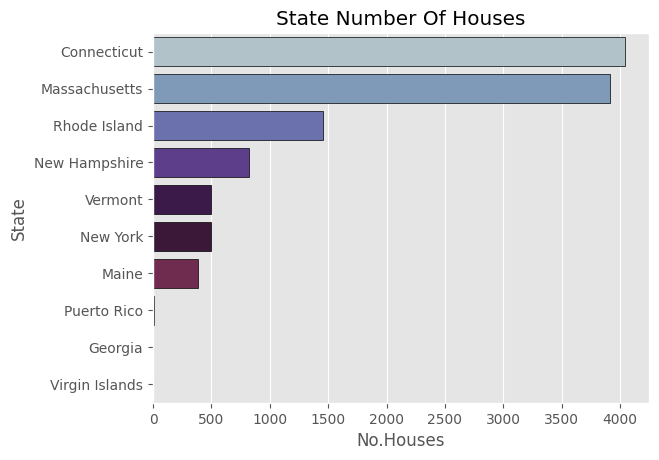

In [62]:
sns.barplot(x=s_mh.values,y=s_mh.index,edgecolor='k',palette='twilight')
plt.title('State Number Of Houses')
plt.xlabel('No.Houses')
plt.ylabel('State')
plt.show()

<b>

### 2.5 City With The Most Expensive Houses

<b>

In [63]:
c_eh=df.groupby('City').Price.max().sort_values(ascending=False).head(10)
c_eh

City
North Hampton      17500000
New Marlborough    15500000
Cambridge          15300000
Chilmark           15000000
Falmouth           14500000
Chatham            13600000
Manchester         12900000
Nantucket          12750000
Boston             12000000
Salisbury          11890000
Name: Price, dtype: int64

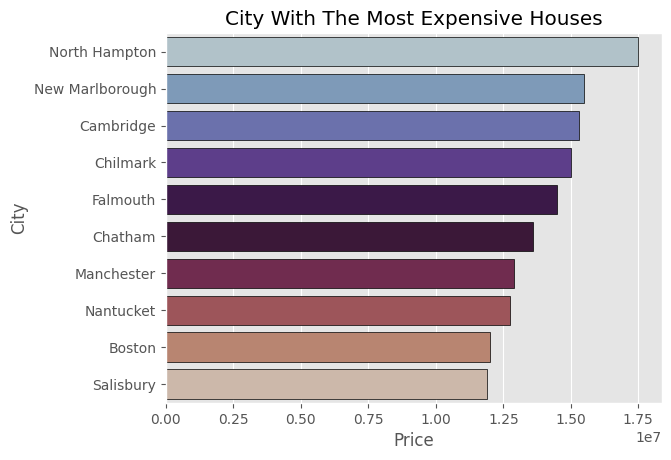

In [64]:
sns.barplot(x=c_eh.values,y=c_eh.index,edgecolor='k',palette='twilight')
plt.title('City With The Most Expensive Houses')
plt.xlabel('Price')
plt.ylabel('City')
plt.show()

<n>

### 2.6 City With The Cheapest Houses

<m>

In [65]:
c_ch=df.groupby('City').Price.min().sort_values(ascending=True).head(10)
c_ch

City
Wrentham       10000
Windham        20000
Ticonderoga    20000
Hebron         23000
Whitehall      24900
Springfield    24900
Simsbury       24900
Perry          27900
Norwich        28900
Brattleboro    29900
Name: Price, dtype: int64

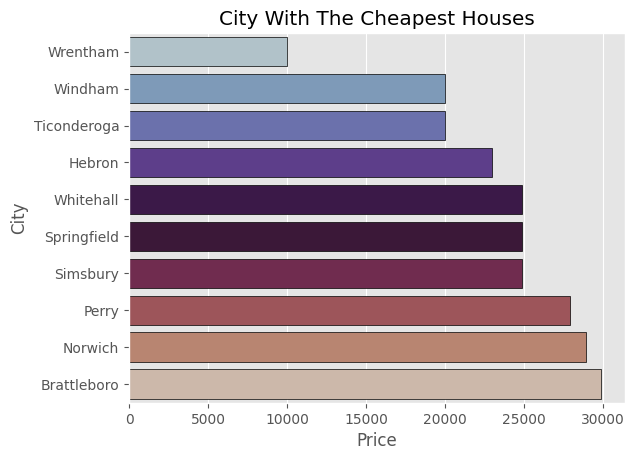

In [66]:
sns.barplot(x=c_ch.values,y=c_ch.index,edgecolor='k',palette='twilight')
plt.title('City With The Cheapest Houses')
plt.xlabel('Price')
plt.ylabel('City')
plt.show()

<m>

### 2.7 State Houses Price

<b>

In [67]:
s_eh=df.groupby('State').Price.max().sort_values(ascending=False).head(10)
s_eh

State
New Hampshire     17500000
Massachusetts     15500000
Connecticut       11890000
New York          10900000
Maine              8500000
Rhode Island       8000000
Virgin Islands     6899000
Vermont            3900000
Puerto Rico        1225000
Georgia             525210
Name: Price, dtype: int64

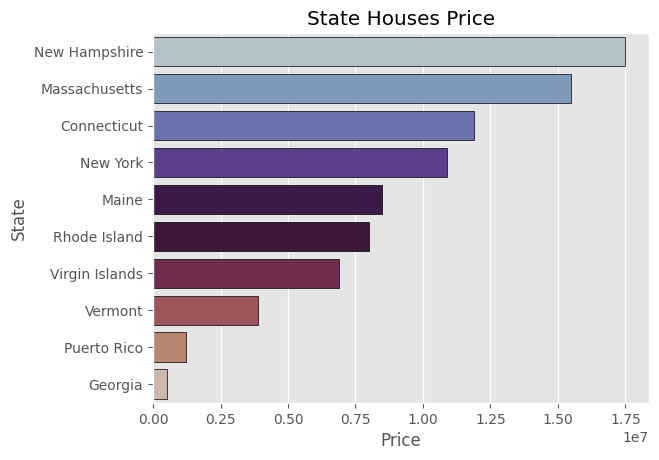

In [68]:
sns.barplot(x=s_eh.values,y=s_eh.index,edgecolor='k',palette='twilight')
plt.title('State Houses Price')
plt.xlabel('Price')
plt.ylabel('State')
plt.show()

<b>

### 2.8 City With The Most Sales 

<m>

In [69]:
c_ms=df.groupby('City').Price.sum().sort_values(ascending=False).head(10)
c_ms

City
Boston        647396367
Nantucket     170046995
Brookline     125549797
Providence    105335695
Cambridge     102320989
Newton        101590099
Montauk        98319000
Manchester     75001899
Newport        74747187
Bristol        61779429
Name: Price, dtype: int64

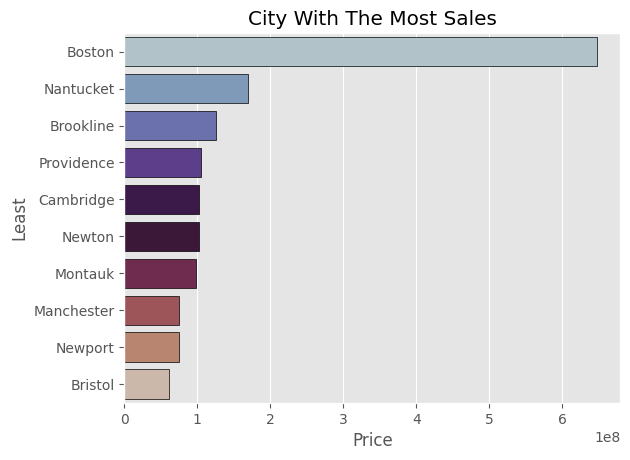

In [70]:
sns.barplot(x=c_ms.values,y=c_ms.index,edgecolor='k',palette='twilight')
plt.title('City With The Most Sales')
plt.xlabel('Price')
plt.ylabel('Least')
plt.show()

<m>

### 2.9 City With The Least Sales

<m>

In [71]:
c_ls=df.groupby('City').Price.sum().sort_values(ascending=True).head(10)
c_ls

City
Schodack Landing     49900
Witherbee            59000
Toa Baja             73400
Brownington          74900
White Creek          75000
Canovanas            76900
Patten               84500
Machias              85000
Perry               106900
Greenbush           109000
Name: Price, dtype: int64

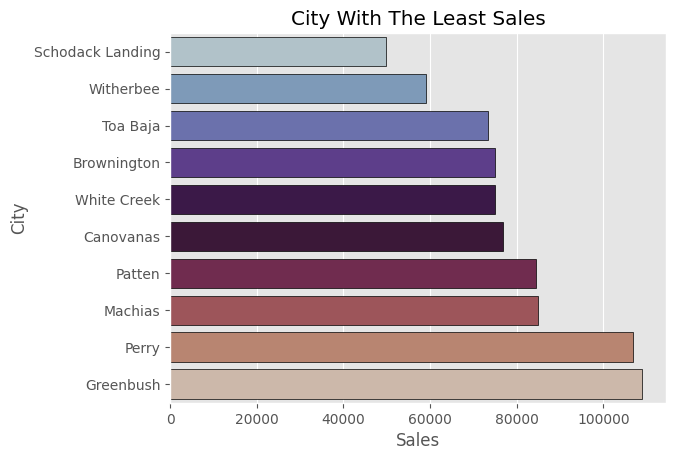

In [72]:
sns.barplot(x=c_ls.values,y=c_ls.index,edgecolor='k',palette='twilight')
plt.title('City With The Least Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

<m>

### 2.10 State Houses Sales

<m>

In [73]:
s_s=df.groupby('State').Price.sum().sort_values(ascending=False).head(10)
s_s

State
Massachusetts     3696463689
Connecticut       1496192106
Rhode Island       745875270
New Hampshire      451241470
New York           321797809
Vermont            218823128
Maine              182345883
Virgin Islands       7849000
Puerto Rico          2619300
Georgia              1497140
Name: Price, dtype: int64

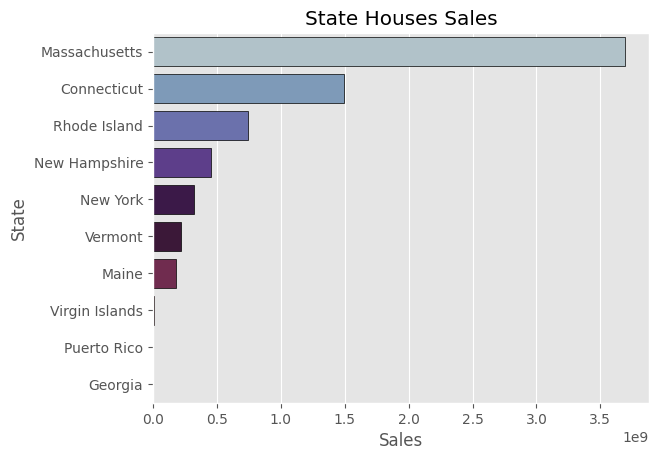

In [74]:
sns.barplot(x=s_s.values,y=s_s.index,edgecolor='k',palette='twilight')
plt.title('State Houses Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

<j>

### 2.11 Relation Between House Sizes And Price

<m>

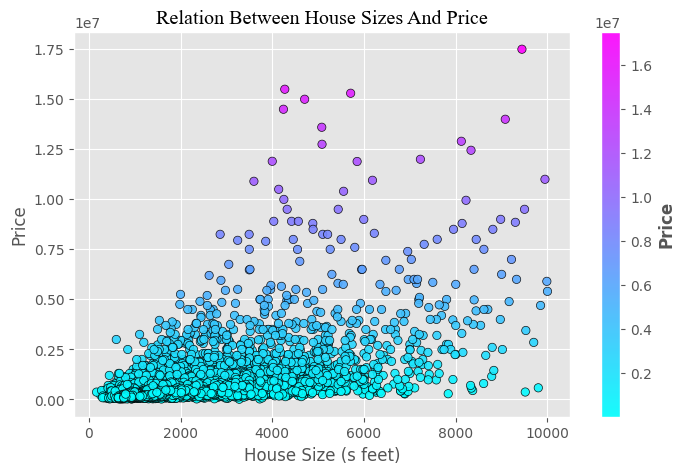

In [98]:
plt.figure(figsize=(8,5))
plt.scatter(df["House_Size(s feet)"],df["Price"],c=df["Price"],edgecolor="k",cmap="cool",alpha=0.9)
plt.title('Relation Between House Sizes And Price',fontfamily='times new roman')
plt.xlabel("House Size (s feet)")
plt.ylabel("Price")
cbar=plt.colorbar()
cbar.set_label("Price",fontsize=12,fontweight="bold")
plt.show()

<b>

### 2.12 Relation Between Number of Beds and Prices

<b>

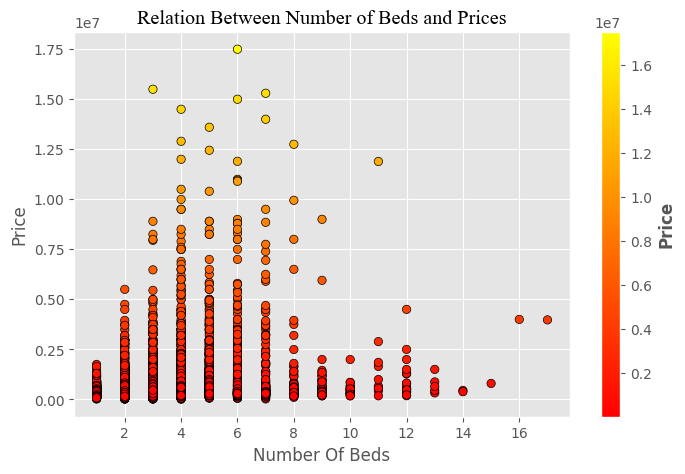

In [102]:
plt.figure(figsize=(8,5))
plt.scatter(df["No.Beds"],df["Price"],c=df["Price"],edgecolor="k",cmap="autumn")
plt.title('Relation Between Number of Beds and Prices',fontfamily='times new roman')
plt.xlabel("Number Of Beds")
plt.ylabel("Price")
cbar=plt.colorbar()
cbar.set_label("Price",fontsize=12,fontweight="bold")

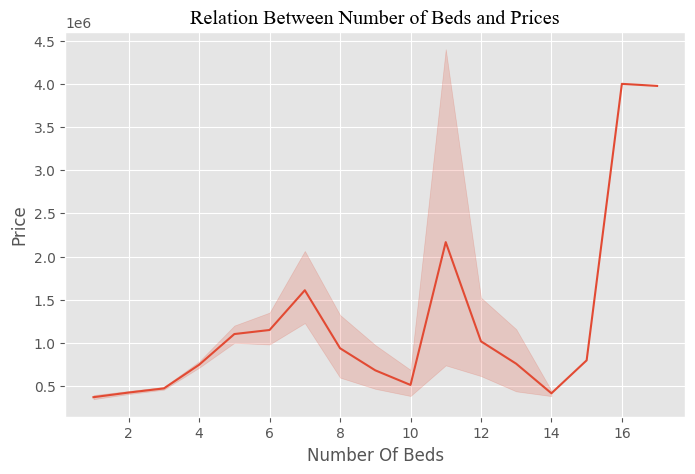

In [114]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df["No.Beds"],y=df["Price"])
plt.title('Relation Between Number of Beds and Prices',fontfamily='times new roman')
plt.xlabel("Number Of Beds")
plt.ylabel("Price")
plt.show()

In [110]:
df.groupby('No.Beds').Price.max().sort_values(ascending=False)

No.Beds
6     17500000
3     15500000
7     15300000
4     14500000
5     13600000
8     12750000
11    11890000
9      8999000
2      5500000
12     4500000
16     3999000
17     3975000
10     1995000
1      1749000
13     1500000
15      799000
14      450000
Name: Price, dtype: int64

<m>

### 2.13 Relation Between Number of Bedrooms and Prices

<m>

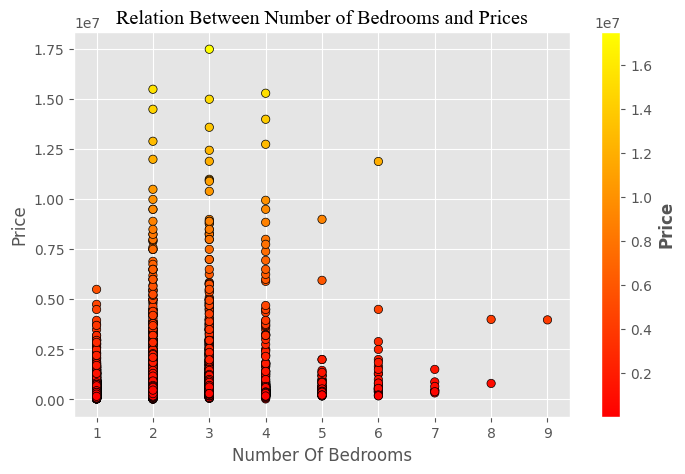

In [123]:
plt.figure(figsize=(8,5))
plt.scatter(df["No.Bedrooms"],df["Price"],c=df["Price"],edgecolor="k",cmap="autumn")
plt.title('Relation Between Number of Bedrooms and Prices',fontfamily='times new roman')
plt.xlabel("Number Of Bedrooms")
plt.ylabel("Price")
cbar=plt.colorbar()
cbar.set_label("Price",fontsize=12,fontweight="bold")

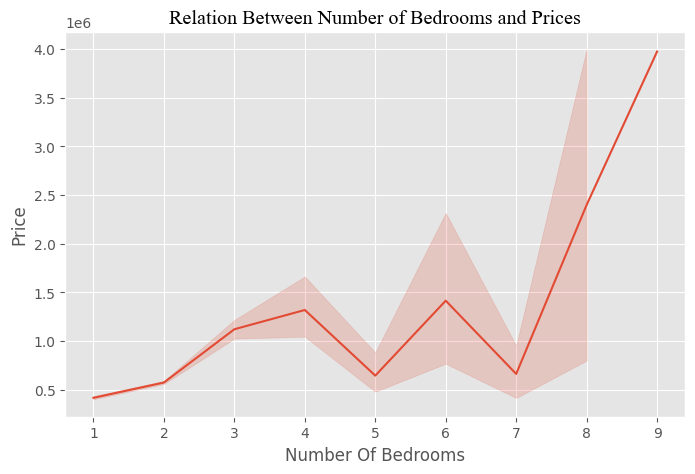

In [113]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df["No.Bedrooms"],y=df["Price"])
plt.title('Relation Between Number of Bedrooms and Prices',fontfamily='times new roman')
plt.xlabel("Number Of Bedrooms")
plt.ylabel("Price")
plt.show()

In [111]:
df.groupby('No.Bedrooms').Price.max().sort_values(ascending=False)

No.Bedrooms
3    17500000
2    15500000
4    15300000
6    11890000
5     8999000
1     5500000
8     3999000
9     3975000
7     1500000
Name: Price, dtype: int64

<b>

### 2.14 Relation Between Number of Baths and Prices

<b>

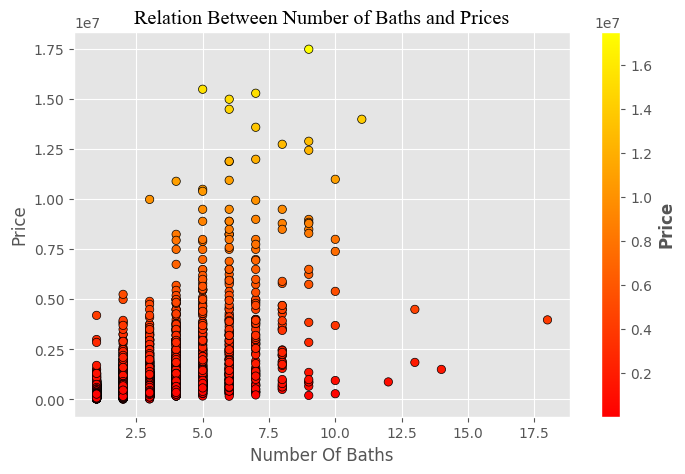

In [117]:
plt.figure(figsize=(8,5))
plt.scatter(df["No.Baths"],df["Price"],c=df["Price"],edgecolor="k",cmap="autumn")
plt.title('Relation Between Number of Baths and Prices',fontfamily='times new roman')
plt.xlabel("Number Of Baths")
plt.ylabel("Price")
cbar=plt.colorbar()
cbar.set_label("Price",fontsize=12,fontweight="bold")

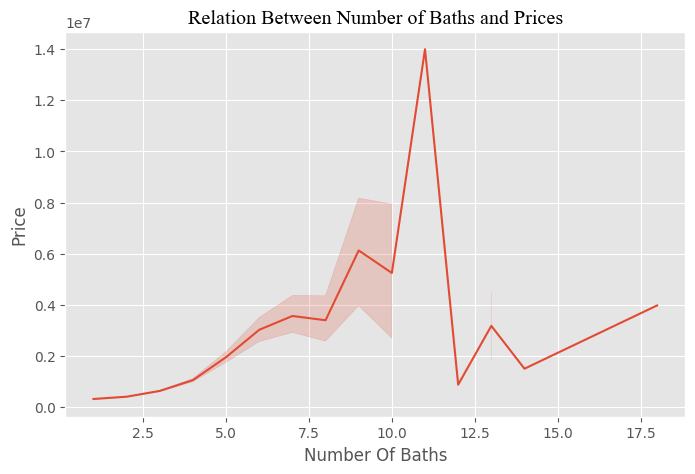

In [116]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df["No.Baths"],y=df["Price"])
plt.title('Relation Between Number of Baths and Prices',fontfamily='times new roman')
plt.xlabel("Number Of Baths")
plt.ylabel("Price")
plt.show()

In [119]:
df.groupby('No.Baths').Price.max().sort_values(ascending=False)

No.Baths
9     17500000
5     15500000
7     15300000
6     15000000
11    14000000
8     12750000
10    10999999
4     10900000
3      9995000
2      5250000
13     4500000
1      4200000
18     3975000
14     1500000
12      875000
Name: Price, dtype: int64

<n>

### 2.15 Sales Period Analysis

<m>

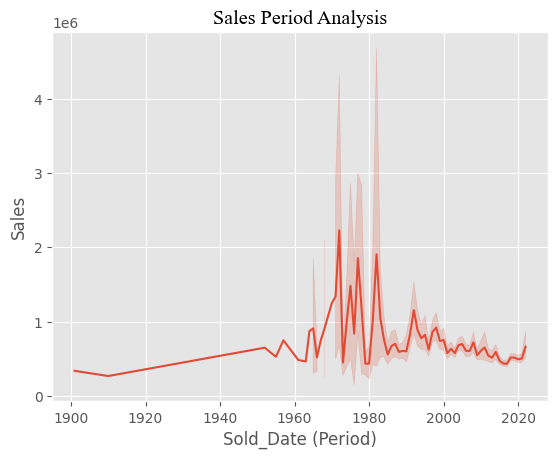

In [130]:
sns.lineplot(x=df['Year'],y=df['Price'])
plt.title('Sales Period Analysis',fontfamily='times new roman')
plt.xlabel('Sold_Date (Period)')
plt.ylabel('Sales')
plt.show()